In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

df = pd.read_csv('ecommerce_sales_clean.csv', parse_dates=['date'])
os.makedirs('visualizations', exist_ok=True)

sns.set_style('whitegrid')
sns.set_palette('husl')

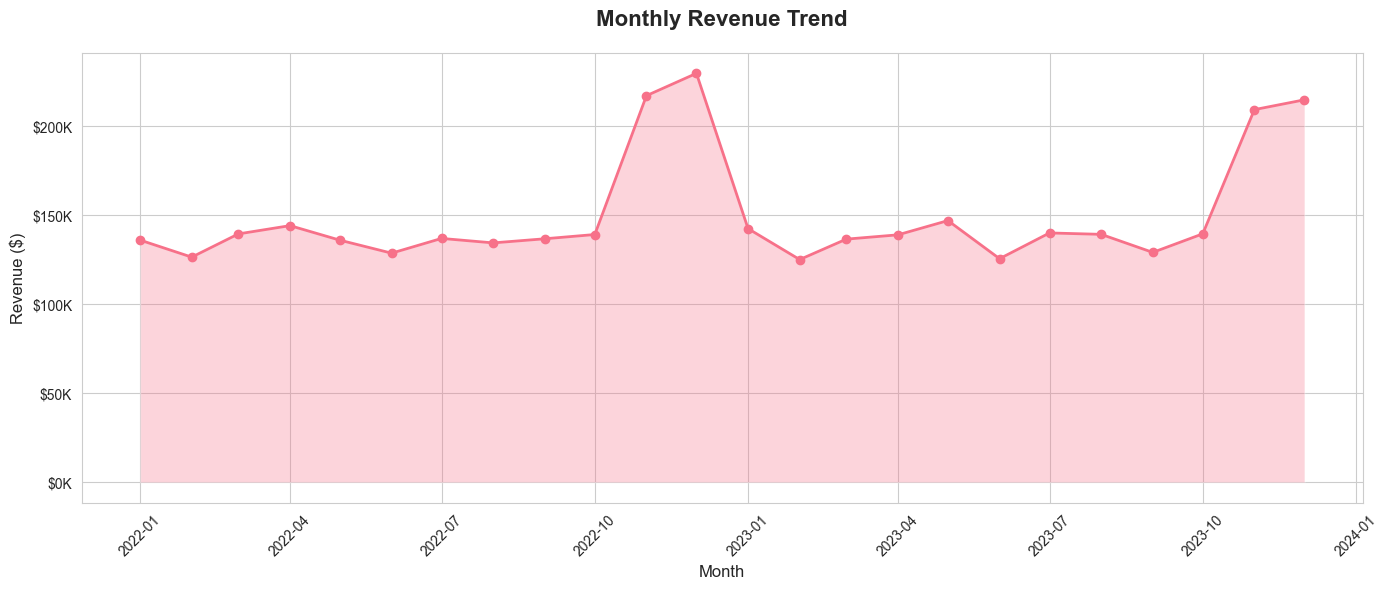

In [2]:
fig, ax = plt.subplots(figsize=(14, 6))
monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['total_revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

ax.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2, markersize=6)
ax.fill_between(monthly_revenue.index, monthly_revenue.values, alpha=0.3)
ax.set_title('Monthly Revenue Trend', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Revenue ($)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visualizations/1_revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()

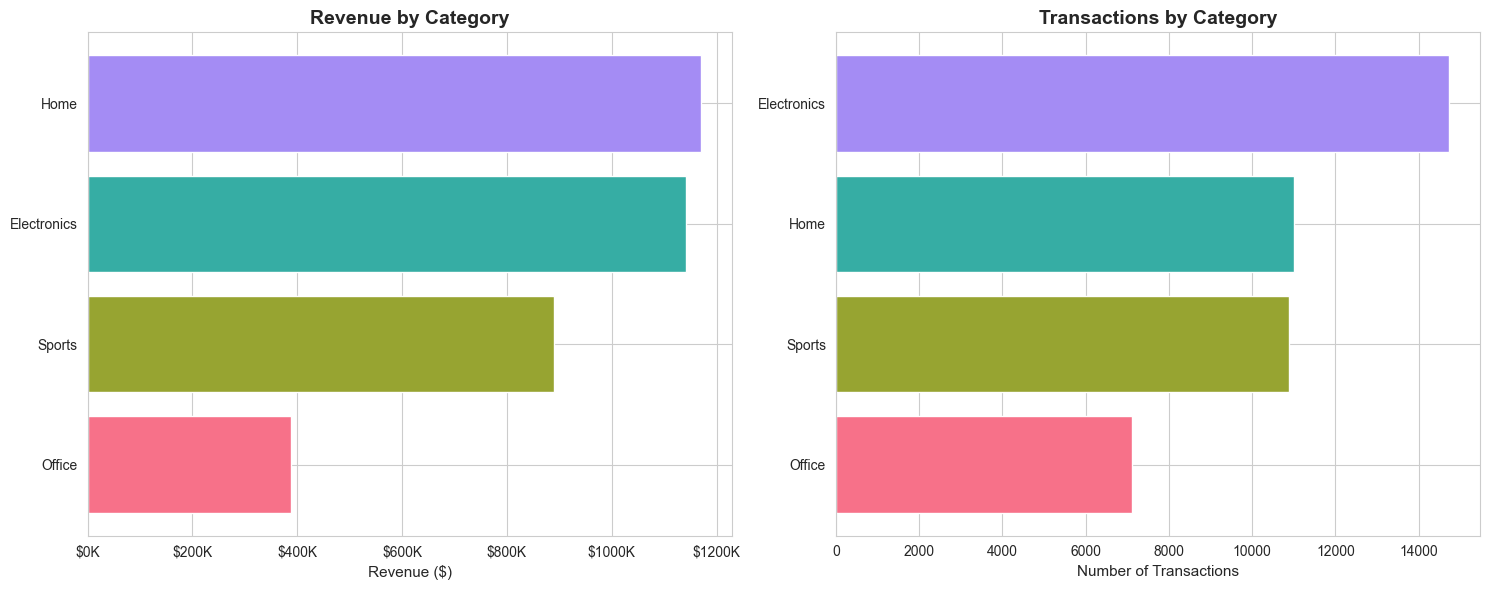

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

category_revenue = df.groupby('category')['total_revenue'].sum().sort_values(ascending=True)
colors = sns.color_palette('husl', len(category_revenue))

ax1.barh(category_revenue.index, category_revenue.values, color=colors)
ax1.set_title('Revenue by Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Revenue ($)', fontsize=11)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

category_trans = df.groupby('category').size().sort_values(ascending=True)
ax2.barh(category_trans.index, category_trans.values, color=colors)
ax2.set_title('Transactions by Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Transactions', fontsize=11)

plt.tight_layout()
plt.savefig('visualizations/2_category_performance.png', dpi=300, bbox_inches='tight')
plt.show()

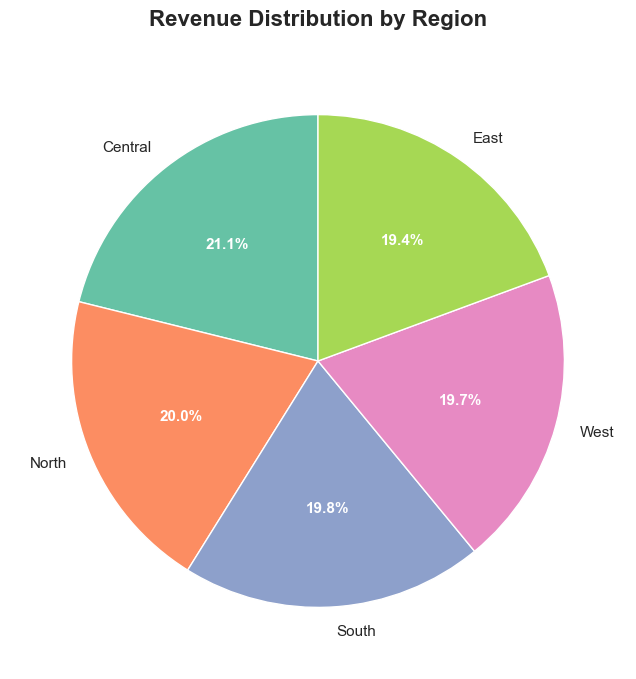

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
region_revenue = df.groupby('region')['total_revenue'].sum().sort_values(ascending=False)
colors = sns.color_palette('Set2', len(region_revenue))

wedges, texts, autotexts = ax.pie(region_revenue.values, 
                                   labels=region_revenue.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   startangle=90,
                                   textprops={'fontsize': 11})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('Revenue Distribution by Region', fontsize=16, fontweight='bold', pad=20)
plt.savefig('visualizations/3_regional_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

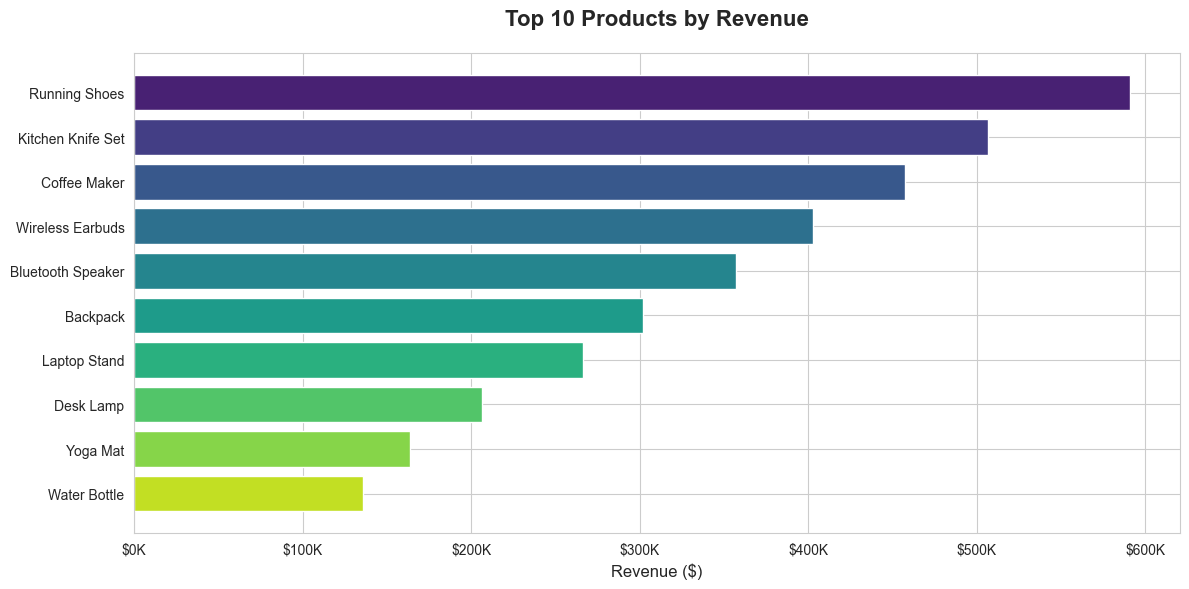

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
top_products = df.groupby('product_name')['total_revenue'].sum().sort_values(ascending=False).head(10)

ax.barh(range(len(top_products)), top_products.values, color=sns.color_palette('viridis', 10))
ax.set_yticks(range(len(top_products)))
ax.set_yticklabels(top_products.index)
ax.set_xlabel('Revenue ($)', fontsize=12)
ax.set_title('Top 10 Products by Revenue', fontsize=16, fontweight='bold', pad=20)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('visualizations/4_top_products.png', dpi=300, bbox_inches='tight')
plt.show()

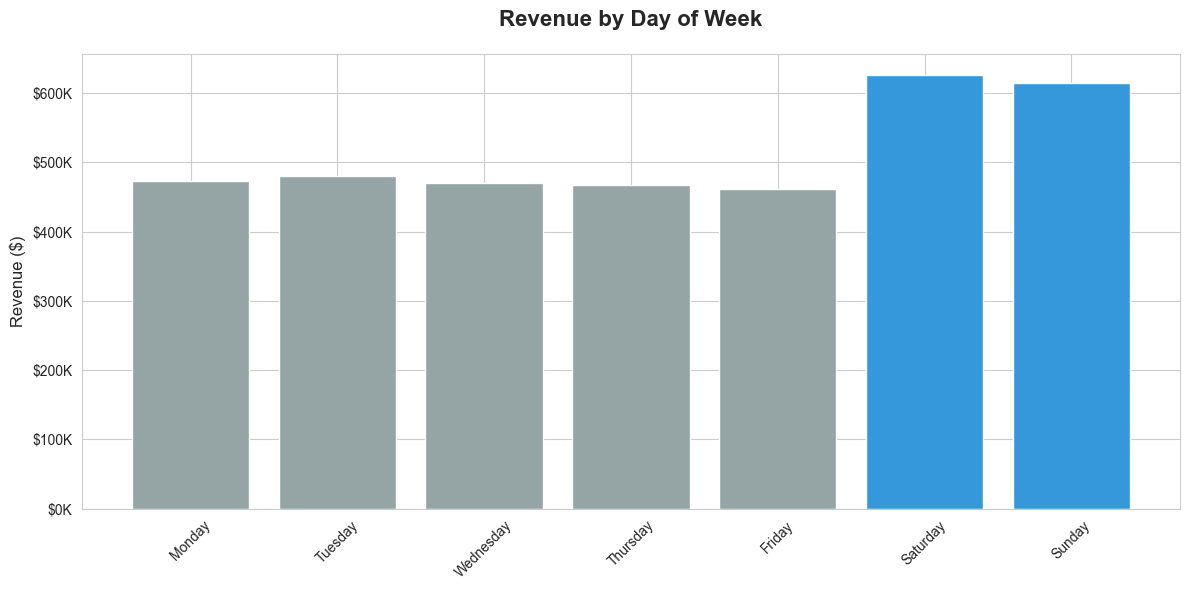

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_revenue = df.groupby('day_of_week')['total_revenue'].sum().reindex(day_order)

colors_days = ['#3498db' if day in ['Saturday', 'Sunday'] else '#95a5a6' for day in day_order]
bars = ax.bar(day_order, day_revenue.values, color=colors_days)

ax.set_title('Revenue by Day of Week', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Revenue ($)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('visualizations/5_day_of_week.png', dpi=300, bbox_inches='tight')
plt.show()

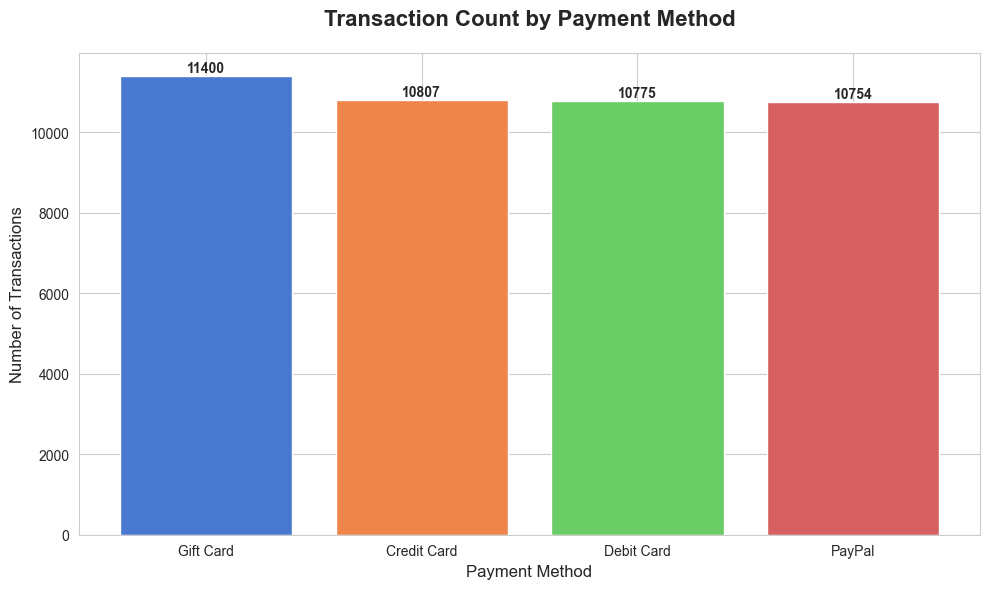

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
payment_dist = df['payment_method'].value_counts()

ax.bar(payment_dist.index, payment_dist.values, color=sns.color_palette('muted', len(payment_dist)))
ax.set_title('Transaction Count by Payment Method', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Number of Transactions', fontsize=12)
ax.set_xlabel('Payment Method', fontsize=12)

for i, v in enumerate(payment_dist.values):
    ax.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('visualizations/6_payment_methods.png', dpi=300, bbox_inches='tight')
plt.show()

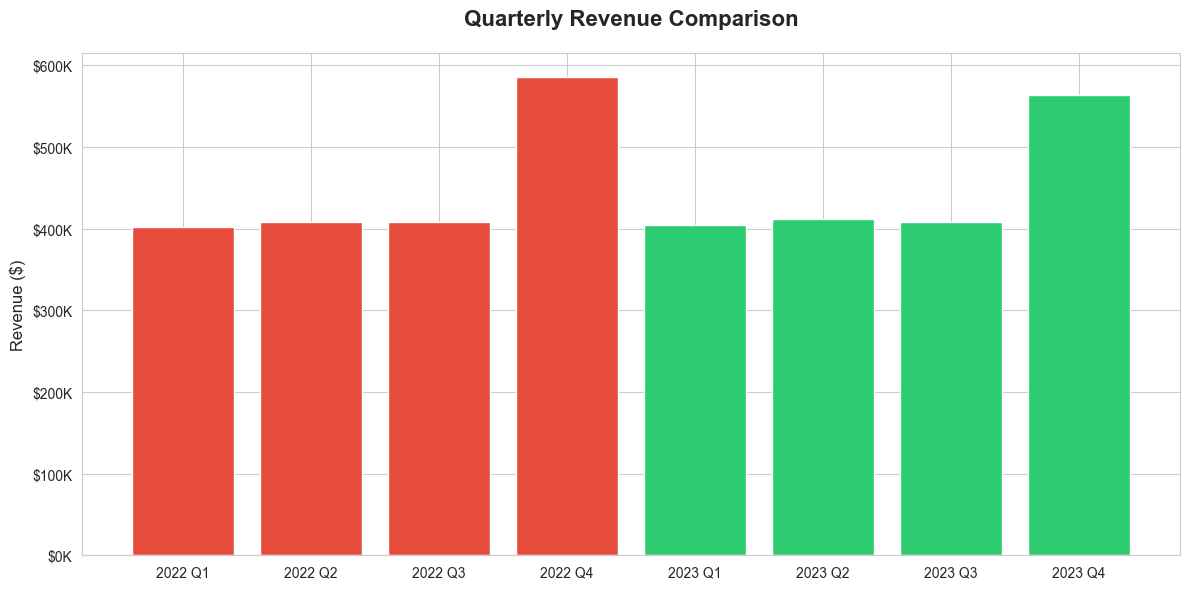

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

quarterly_data = df.groupby(['year', 'quarter'])['total_revenue'].sum().reset_index()
quarterly_data['period'] = quarterly_data['year'].astype(str) + ' Q' + quarterly_data['quarter'].astype(str)

x = range(len(quarterly_data))
colors_q = ['#e74c3c' if year == 2022 else '#2ecc71' for year in quarterly_data['year']]

ax.bar(x, quarterly_data['total_revenue'].values, color=colors_q)
ax.set_xticks(x)
ax.set_xticklabels(quarterly_data['period'])
ax.set_title('Quarterly Revenue Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Revenue ($)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('visualizations/7_quarterly_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

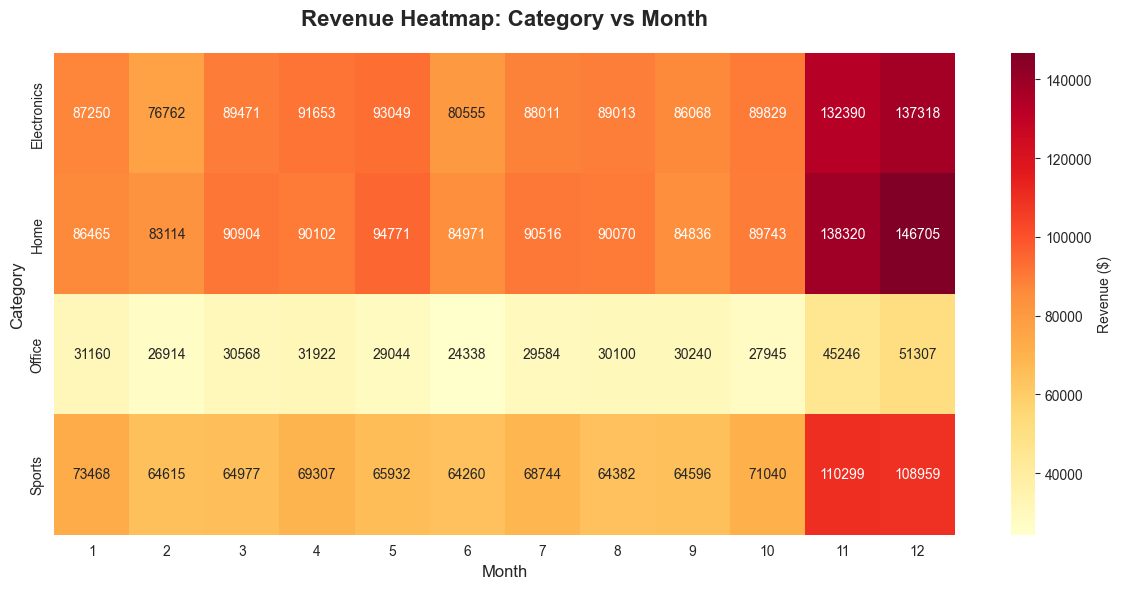

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

heatmap_data = df.pivot_table(values='total_revenue', 
                               index='category', 
                               columns='month', 
                               aggfunc='sum')

sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Revenue ($)'})
ax.set_title('Revenue Heatmap: Category vs Month', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Category', fontsize=12)

plt.tight_layout()
plt.savefig('visualizations/8_heatmap_category_month.png', dpi=300, bbox_inches='tight')
plt.show()